# Programming Exercise 2: Logistic Regression

The following homework is based on WEEK 3 of the Machine Learning course done by Andrew NG and graded making use of [Python Programming Assignments](https://github.com/dibgerge/ml-coursera-python-assignments) 



## 1 Logistic Regression

<i> Requirements: </i>

- build a logistic regression model to
predict whether a student gets admitted into a university.


Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
<b> results on two exams </b>. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, <b> you have the applicant’s scores on two exams and the admissions
decision. </b>
Your task is to build a <u> classification model </u> that estimates an applicant’s
probability of admission based the scores from those two exams

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
import seaborn as sns


import utils

grader = utils.Grader()

%matplotlib inline

# Disable jedi autocompleter
%config Completer.use_jedi = False


In [71]:
data = pd.read_csv('Data/ex2data1.txt',sep=',',header=None,names=["first_exam","second_exam","Results"])
df = pd.DataFrame(data)

X, y = df[df.columns[0:2]], df[df.columns[-1]] # Define features and target variable 

# (Ungraded) Plotting the data

In [3]:
df.describe()

,first_exam,second_exam,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


<AxesSubplot:xlabel='first_exam', ylabel='Count'>

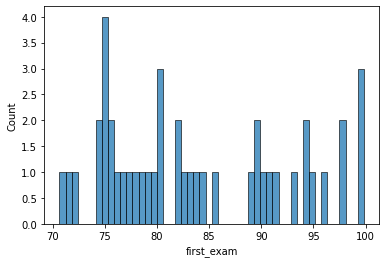

In [4]:
sns.histplot( df.first_exam[df.first_exam>70] ,bins=50)

In [5]:
X.first_exam



0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: first_exam, Length: 100, dtype: float64

Creating a Crossplot/Scatterplot

In [6]:
import collections

collections.Counter(y)

Counter({0: 40, 1: 60})

In [7]:
#from matplotlib import colors
def plotData(X, y):
    plt.rcParams['figure.figsize'] = (8,8)

    #cmap = colors.ListedColormap(['blue', 'red'])

    plt.scatter(X.first_exam,X.second_exam,c=y, marker='x' ,vmin=0,vmax=1,cmap='rainbow') # c represents the target variable

    plt.ylabel("Second Exam Scores",fontsize=14)
    plt.xlabel("First Exam Scores",fontsize=14)

    plt.colorbar(label='Values of target Y')

    plt.show()

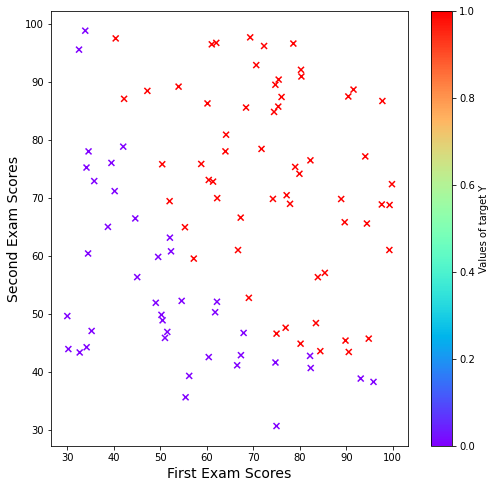

In [8]:
plotData(X, y)


The values of `y` represent if a student is not admitted, if he is admitted the color yields a violet color , otherwise it yields green

<a id="section1"></a>

### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$

Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

In [38]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1+ np.exp(-z))

In [10]:
sigmoid(y)

0     0.500000
1     0.500000
2     0.500000
3     0.731059
4     0.731059
        ...   
95    0.731059
96    0.731059
97    0.731059
98    0.731059
99    0.731059
Name: Results, Length: 100, dtype: float64

In [37]:
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [12]:
# appends the implemented function in part 1 to the grader object
grader[1] = sigmoid

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

Invalid email or token. You used an invalid email or your token may have expired. Please make sure you have entered all fields correctly. Try generating a new token if the issue still persists.


In [72]:
# preparing the data for logistic regression
m, n = X.shape
# Setup the data matrix appropriately, and add ones for the intercept term

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

n = n + 1

In [52]:
def h_theta(X,theta):
    return sigmoid(np.dot(X,theta))

In [94]:

def costFunction(theta, X, y):

    Element = -y * (np.log(h_theta(X,theta))) -  (1-y) * np.log(1-h_theta(X,theta))
    
    J_theta=  np.sum(Element)/m

    return J_theta
    

In [96]:

theta= np.zeros(n)
theta= theta.reshape(n,1)


L=costFunction(theta,X,y.values.reshape(-1,1))  
L

0.6931471805599453

Implementing: 
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [124]:
def gradient(theta,X,y):
        Element = (h_theta(X,theta) - y)
        gradient = np.divide(np.dot(X.transpose(),Element),m)
        return gradient

In [122]:
def GradientDescent(X,y,theta,alpha,iterations):
    for _ in range(iterations):
        dJ = gradient(theta,X,y)
        theta = theta - np.multiply(alpha/m,dJ)
    return theta

theta_optimized = GradientDescent(X, y.values.reshape(-1,1), theta, alpha=0.01, iterations=500000)

display(theta)

array([[-2.84944923],
       [ 0.03070159],
       [ 0.0227594 ]])

In [123]:
L= costFunction(theta_optimized,X,y.values.reshape(-1,1)
)
L

0.3873900079685839

# Learning parameters using fminunc

In python `fmin_tnc` allows us to find the optimal parameter $\theta$ for logistic regression.

In [125]:
import scipy.optimize as opt

temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.values.flatten()))
#the output of above function is a tuple whose first element #contains the optimized values of theta
theta_optimized = temp[0]
print(theta_optimized)

[-25.24899461   0.20692816   0.20218475]


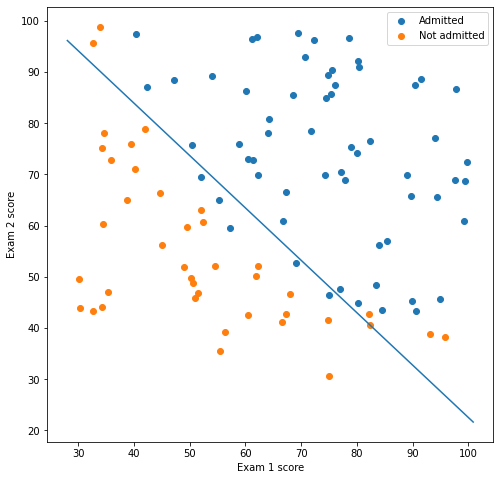

In [126]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]


plot_y = -1/theta_optimized[2]*(theta_optimized[0] 
          + np.dot(theta_optimized[1],plot_x))  


mask = y.values.flatten() == 1

adm = plt.scatter(X[mask][:,1], X[mask][:,2])

not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])



decision_boun = plt.plot(plot_x, plot_y)


plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))


plt.show()


In [119]:
theta_optimized

array([-25.24899461,   0.20692816,   0.20218475])

# Finding the Acuraccy of the Model

# Regularized logistic regression